In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
from IPython.display import HTML
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d.art3d import Line3D

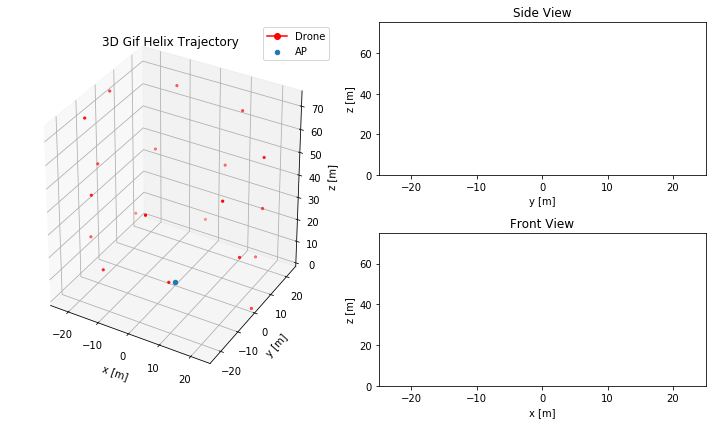

In [31]:
class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure(figsize=(10, 6))
        ax1 = fig.add_subplot(1, 2, 1,projection="3d")
        plt.title('3D Gif Helix Trajectory')
        ax2 = fig.add_subplot(2, 2, 2)
        plt.title('Side View')
        ax3 = fig.add_subplot(2, 2, 4)
        plt.title('Front View')
        
        self.t = np.linspace(0, 37.5, 100) #start, end , steps
        self.x = 25*np.cos(1 / 3 / 2.4 * 10 * np.pi * self.t / 10.)
        self.y = 25*np.sin(1 / 3 / 2.4 * 10 * np.pi * self.t / 10.)
        self.z = 2 * self.t
        self.t1 = np.linspace(0, 37.5, 20)
        self.z1 = 2 * self.t1
        self.x1 = 25*np.cos(1 / 3 /2.4 * 10 * np.pi * self.t1 / 10.)
        self.y1 = 25*np.sin(1 / 3 /2.4 * 10 * np.pi * self.t1 / 10.)
        ax1.scatter3D(self.x1, self.y1, self.z1, color='Red', marker ='.'); #20 iterarion positions
        

        ax1.set_xlabel('x [m]')
        ax1.set_ylabel('y [m]')
        ax1.set_zlabel('z [m]')
        self.line1 = Line3D([], [], [], color='black')
        self.line1a = Line3D([], [], [], color='red', linewidth=2)
        self.line1e = Line3D(
            [], [],[], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-25, 25)
        ax1.set_ylim(-25, 25)
        ax1.set_zlim(0, 75)
        Ap = ax1.scatter(0,0,0)
        #ax1.set_aspect('equal', 'datalim')


        ax2.set_xlabel('y [m]')
        ax2.set_ylabel('z [m]')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(-25, 25)
        ax2.set_ylim(0, 75)

        ax3.set_xlabel('x [m]')
        ax3.set_ylabel('z [m]')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-25, 25)
        ax3.set_ylim(0, 75)
        plt.tight_layout()
        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)
        ax1.legend([self.line3e,  Ap], ["Drone", "AP"])
        #plt.title('3D Gif Helix Trajectory')
        
    def _draw_frame(self, framedata):
        i = framedata
        head = i - 1
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.x[:i], self.y[:i])
        self.line1.set_3d_properties(self.z[:i])
        #ax1.scatter3D(self.x1[:i], self.y1[:i], self.z1[:i], color='Red');
        self.line1a.set_data(self.x[head_slice], self.y[head_slice])
        self.line1a.set_3d_properties(self.z[head_slice])
        self.line1e.set_data(self.x[head], self.y[head])
        self.line1e.set_3d_properties(self.z[head])

        self.line2.set_data(self.y[:i], self.z[:i])
        self.line2a.set_data(self.y[head_slice], self.z[head_slice])
        self.line2e.set_data(self.y[head], self.z[head])

        self.line3.set_data(self.x[:i], self.z[:i])
        self.line3a.set_data(self.x[head_slice], self.z[head_slice])
        self.line3e.set_data(self.x[head], self.z[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
                               self.line2, self.line2a, self.line2e,
                               self.line3, self.line3a, self.line3e]

    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,
                 self.line2, self.line2a, self.line2e,
                 self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])
     
ani = SubplotAnimation()

In [32]:
fn = 'line_animation_3d_with_two_2d_timedanimation'
#ani.save('%s.mp4'%(fn), writer='ffmpeg',fps=1000/50)
ani.save('%s.gif'%(fn), writer='imagemagick',fps=1000/50)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [24]:
t = np.linspace(0, 30, 20) #start, end , steps
for i in range(21):
    #print(i)
    t = 1.5 * i
    #print(t)
    t1 = t + 1.5
    x = 25*np.cos(1 / 6 * 10 * np.pi * t / 10.)     #current position
    y = 25*np.sin(1 / 6 * 10 * np.pi * t / 10.)
    z = 2.5 * t
    x1 = 25*np.cos(1 / 6 * 10 * np.pi * t1 / 10.)   #next position
    y1 = 25*np.sin(1 / 6 * 10 * np.pi * t1 / 10.)
    z1 = 2.5 * t1
    x2 = x1 - x     #vector towards next position
    y2 = y1 - y
    z2 = z1 - z
    x3 = x2 / 1.5   #speed
    y3 = y2 / 1.5
    z3 = z2 / 1.5
    print("%.2f" % y3)
    #print("%.2f" % x)
    #print(x)


11.79
4.88
-4.88
-11.79
-11.79
-4.88
4.88
11.79
11.79
4.88
-4.88
-11.79
-11.79
-4.88
4.88
11.79
11.79
4.88
-4.88
-11.79
-11.79
